**Statistical Models for time series forecasting : ARIMA / SARIMA / FOURRIER TRANSFORMATION / EXPONENTIAL SMOOTHING**

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [139]:
data= pd.read_csv('./datasets/passenger.csv', parse_dates=['Month'],index_col='Month')
#split data into train and test
train= data[:int(0.8*(len(data)))]
test= data[int(0.8*(len(data))):]

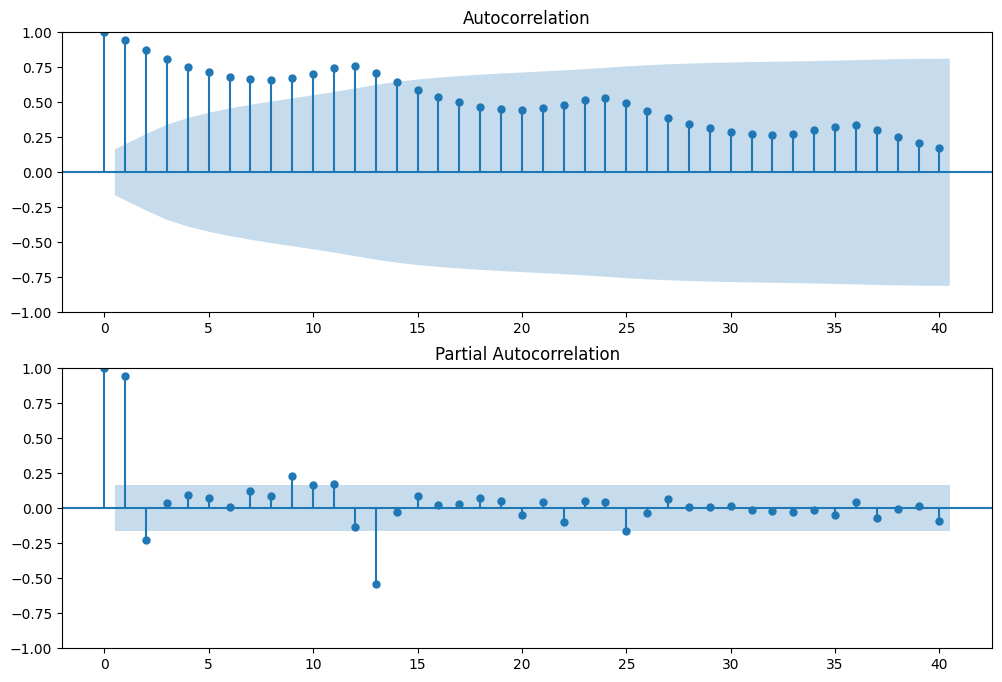

In [70]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data.values.squeeze(), lags=40, ax=ax1) # Q q ,spikes patterns for seasonal period too

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data, lags=40, ax=ax2) # P p


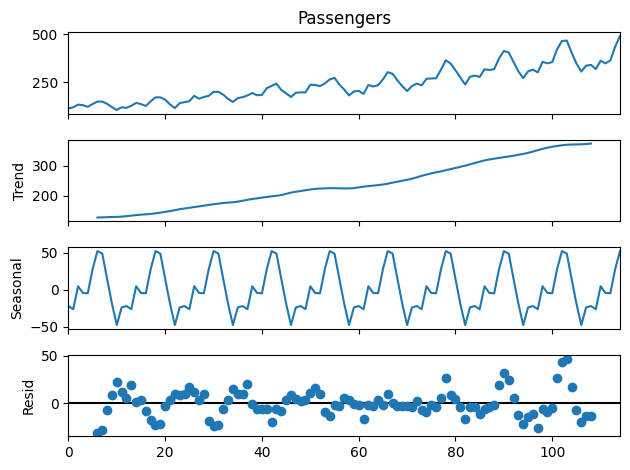

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(train['Passengers'], model='additive', period=12)
result.plot()
plt.show()

In [147]:
arima_test= ARIMA(train['Passengers'], order=(12,1,12)).fit()
print(arima_test.params)

/home/lost-elf/anaconda3/envs/stats/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/lost-elf/anaconda3/envs/stats/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/lost-elf/anaconda3/envs/stats/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/lost-elf/anaconda3/envs/stats/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/lost-elf/anaconda3/envs/stats/lib/python3

ar.L1      0.110680
ar.L2     -0.118563
ar.L3      0.125049
ar.L4     -0.103624
ar.L5      0.096280
ar.L6     -0.093698
ar.L7      0.046433
ar.L8     -0.088855
ar.L9      0.032330
ar.L10    -0.086878
ar.L11     0.077355
ar.L12     0.860073
ma.L1     -0.229456
ma.L2      0.082680
ma.L3     -0.268280
ma.L4     -0.111505
ma.L5      0.073047
ma.L6     -0.040300
ma.L7     -0.011764
ma.L8     -0.134766
ma.L9      0.096334
ma.L10    -0.098884
ma.L11     0.223457
ma.L12    -0.220452
sigma2    67.641182
dtype: float64


/home/lost-elf/anaconda3/envs/stats/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [148]:
# predict the values
predicted=arima_test.forecast(steps=len(test))
real_values= data['Passengers'][int(0.8*(len(data))):]

In [72]:
# Mean Absolute Percentage Error
mape=mean_absolute_error(real_values,predicted)
print(mape)

32.33715073356467


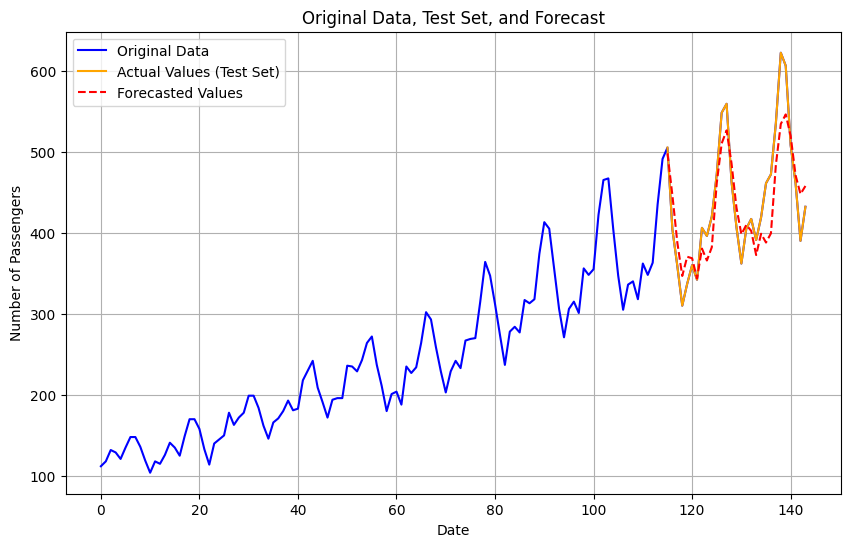

In [54]:
data= pd.read_csv('./datasets/passenger.csv')
forecast_index = data['Month'].index[len(train):len(train)+len(test)+1]  # Adjust if the steps exceed 20 months
forecast_values = predicted

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["Passengers"], label="Original Data", color="blue")

# Plot the actual test data
plt.plot(test.index, test.values, label="Actual Values (Test Set)", color="orange")

# Plot the forecasted values
plt.plot(forecast_index, forecast_values, label="Forecasted Values", color="red", linestyle="dashed")

# Add title, legend, and labels
plt.title("Original Data, Test Set, and Forecast")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.grid()
plt.show()

**Method to automatically find optimal P,Q,D**

In [29]:

from pmdarima import auto_arima as AutoARIMA

# Fit ARIMA automatically
auto_arima_model = AutoARIMA(
    train['Passengers'],
    start_p=0, max_p=15,
    start_q=0, max_q=15,
    d=None,       # Let the algorithm determine 'd'
    stationary=False,
    seasonal=False,  # Set to True if you have seasonal data
    trace=True,    # Print progress
    error_action="ignore",  # Ignore non-converging models
    suppress_warnings=True,
    stepwise="Parallelized"
)

with open('auto_arima_model.txt', 'w') as f:
    f.write(str(auto_arima_model.summary()))



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1076.519, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1069.440, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1064.624, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1076.271, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1058.834, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1061.078, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1066.203, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1058.246, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1063.646, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1068.536, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1058.648, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1057.3

In [26]:
auto_prediction= auto_arima_model.predict(len(test))

In [27]:
# Mean Absolute Percentage Error
real_values= data['Passengers'][int(0.8*(len(data))):]
mape=mean_absolute_error(real_values,auto_prediction)
print(mape)

61.106795877355246


**Optimizing p, q , d from scratch**

In [63]:
import statsmodels.api as sm
# import statsmodels.tsa.stattools as sm
import numpy as np
import matplotlib.pyplot as plt

# Calculate the ACF values (returns autocorrelations and lags)
acf_values, confint = sm.tsa.acf(data, nlags=40, alpha=0.05, fft=True)
# Sort ACF values and get top n (e.g., top 5)
top_n = 10
sorted_acf_indices = np.argsort(np.abs(acf_values))[-top_n:]  # Sort by absolute value of ACF
sorted_acf_values = acf_values[sorted_acf_indices]

# Print top sorted values
print("Top sorted ACF values for lags:")
q_choices=[]
for lag, acf in zip(sorted_acf_indices, sorted_acf_values):
    print(f"Lag {lag}: ACF {acf:.4f}")
    q_choices.append(lag+1)
print(q_choices)


Top sorted ACF values for lags:
Lag 10: ACF 0.7027
Lag 13: ACF 0.7127
Lag 5: ACF 0.7138
Lag 11: ACF 0.7432
Lag 4: ACF 0.7526
Lag 12: ACF 0.7604
Lag 3: ACF 0.8067
Lag 2: ACF 0.8756
Lag 1: ACF 0.9480
Lag 0: ACF 1.0000
[10, 13, 5, 11, 4, 12, 3, 2, 1, 0]


In [75]:
pacf_values, pconfint = sm.tsa.pacf(data, nlags=40, alpha=0.05, method='ywmle')
print(pacf_values)
print(pconfint)
# Sort PACF values and get top n
top_n = 10
sorted_pacf_indices = np.argsort(np.abs(pacf_values))[-top_n:]  # Sort by absolute value of PACF
sorted_pacf_values = pacf_values[sorted_pacf_indices]

# Print top sorted values
print("Top sorted PACF values for lags:")
p_choices=[]
for plag, pacf in zip(sorted_pacf_indices, sorted_pacf_values):
    print(f"Lag {plag}: PACF {pacf:.4f}")
    p_choices.append(plag+1)
print(p_choices)


[ 1.          0.94804734 -0.22942187  0.03814778  0.09378544  0.0736067
  0.0077276   0.12559713  0.08995134  0.23248854  0.16605126  0.17127442
 -0.1354311  -0.53969124 -0.02661014  0.09076498  0.02495556  0.03251557
  0.07343264  0.04844211 -0.04554168  0.04575294 -0.10017888  0.05243494
  0.04801413 -0.16274616 -0.03613503  0.06642377  0.00617612  0.00753714
  0.01935049 -0.01025146 -0.01831018 -0.02900136 -0.01480497 -0.0477246
  0.04620366 -0.0666976  -0.00229644  0.0160981  -0.08833969]
[[ 1.00000000e+00  1.00000000e+00]
 [ 7.84717009e-01  1.11137767e+00]
 [-3.92752206e-01 -6.60915421e-02]
 [-1.25182552e-01  2.01478113e-01]
 [-6.95448939e-02  2.57115770e-01]
 [-8.97236342e-02  2.36937030e-01]
 [-1.55602729e-01  1.71057935e-01]
 [-3.77332019e-02  2.88927462e-01]
 [-7.33789889e-02  2.53281675e-01]
 [ 6.91582102e-02  3.95818874e-01]
 [ 2.72092776e-03  3.29381592e-01]
 [ 7.94408770e-03  3.34604752e-01]
 [-2.98761434e-01  2.78992298e-02]
 [-7.03021574e-01 -3.76360910e-01]
 [-1.8994047

In [76]:
# if non stationary data d=1 else d=0
real_values= data['Passengers'][int(0.8*(len(data))):]

results = []
for p in p_choices:
    for q in q_choices:
        try:
            arima = ARIMA(train['Passengers'], order=(p,1,q)).fit()
            predicted_sarima=arima.forecast(steps=len(test))
            mape=mean_absolute_error(real_values,predicted_sarima)
            results.append((p, q, mape))      
        except:
            print(f"ARIMA({p},1,{q}) failed to converge.")

# Sort results by MAPE
results.sort(key=lambda x: x[2])
print(results)


/home/lost-elf/anaconda3/envs/stats/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/lost-elf/anaconda3/envs/stats/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/lost-elf/anaconda3/envs/stats/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/lost-elf/anaconda3/envs/stats/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/lost-elf/anaconda3/envs/stats/lib/python3.8/site-packages/

[(13, 10, 24.74540082297347), (13, 11, 26.353050514974264), (14, 10, 26.828827475232668), (13, 12, 27.82609209897645), (13, 13, 28.271665552312378), (26, 10, 28.333147689806818), (12, 10, 28.533254419270772), (12, 13, 29.88473378369033), (14, 12, 30.039222164567153), (14, 4, 30.451109199898916), (26, 11, 31.198152652138052), (14, 11, 31.2359052020104), (12, 12, 32.33715073356467), (14, 3, 32.587718610393594), (11, 1, 32.97422801667909), (14, 13, 33.013448814835186), (26, 13, 33.10203423641792), (12, 11, 33.52248518981058), (26, 1, 33.83398135541172), (26, 4, 33.91929990488207), (13, 5, 34.053151977545305), (13, 2, 34.12965466950457), (26, 5, 34.248592322889486), (26, 0, 34.35721079401401), (26, 2, 35.25327811658143), (14, 5, 35.604605211913416), (26, 3, 36.08510422165893), (14, 2, 36.10413034275866), (13, 4, 36.490938490868736), (26, 12, 36.95535013181658), (12, 4, 36.963391466829634), (12, 3, 37.06099607649396), (13, 0, 37.69853489944701), (12, 5, 37.85918239167131), (12, 1, 38.200842

/home/lost-elf/anaconda3/envs/stats/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/lost-elf/anaconda3/envs/stats/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/lost-elf/anaconda3/envs/stats/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/lost-elf/anaconda3/envs/stats/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/lost-elf/anaconda3/envs/stats/lib/python3.8/site-packages/statsmode

In [79]:
# Sort results by MAPE
results.sort(key=lambda x: x[2])
print(results)
best_p, best_q, best_mape = results[0][0], results[0][1], results[0][2]
print(f"best p: {best_p}, best q: {best_q}")

[(13, 10, 24.74540082297347), (13, 11, 26.353050514974264), (14, 10, 26.828827475232668), (13, 12, 27.82609209897645), (13, 13, 28.271665552312378), (26, 10, 28.333147689806818), (12, 10, 28.533254419270772), (12, 13, 29.88473378369033), (14, 12, 30.039222164567153), (14, 4, 30.451109199898916), (26, 11, 31.198152652138052), (14, 11, 31.2359052020104), (12, 12, 32.33715073356467), (14, 3, 32.587718610393594), (11, 1, 32.97422801667909), (14, 13, 33.013448814835186), (26, 13, 33.10203423641792), (12, 11, 33.52248518981058), (26, 1, 33.83398135541172), (26, 4, 33.91929990488207), (13, 5, 34.053151977545305), (13, 2, 34.12965466950457), (26, 5, 34.248592322889486), (26, 0, 34.35721079401401), (26, 2, 35.25327811658143), (14, 5, 35.604605211913416), (26, 3, 36.08510422165893), (14, 2, 36.10413034275866), (13, 4, 36.490938490868736), (26, 12, 36.95535013181658), (12, 4, 36.963391466829634), (12, 3, 37.06099607649396), (13, 0, 37.69853489944701), (12, 5, 37.85918239167131), (12, 1, 38.200842

**SARIMA**

SARIMA(p, d, q)(P, D, Q, s):

AR(p): Autoregressive component of order p

MA(q): Moving average component of order q

I(d): Integrated component of order d

Seasonal AR(P): Seasonal autoregressive component of order P

MA(Q): Seasonal moving average component of order Q

Seasonal I(D): Seasonal integrated component of order D

s: Seasonal period


In [81]:
sarima_test = SARIMAX(train['Passengers'], order=(11,1,11), seasonal_order=(1,1,1,12)).fit() 

/home/lost-elf/anaconda3/envs/stats/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/lost-elf/anaconda3/envs/stats/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/lost-elf/anaconda3/envs/stats/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.47666D+00    |proj g|=  3.31432D-01

At iterate    5    f=  3.22795D+00    |proj g|=  3.04300D-01

At iterate   10    f=  3.15852D+00    |proj g|=  6.28290D-02

At iterate   15    f=  3.14596D+00    |proj g|=  5.99584D-02

At iterate   20    f=  3.13819D+00    |proj g|=  2.17149D-02

At iterate   25    f=  3.13516D+00    |proj g|=  2.26847D-02

At iterate   30    f=  3.13424D+00    |proj g|=  1.53246D-02

At iterate   35    f=  3.13110D+00    |proj g|=  2.71809D-02

At iterate   40    f=  3.12978D+00    |proj g|=  1.76298D-02

At iterate   45    f=  3.12863D+00    |proj g|=  1.11459D-02


/home/lost-elf/anaconda3/envs/stats/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  3.12782D+00    |proj g|=  1.01842D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25     50     56      1     0     0   1.018D-02   3.128D+00
  F =   3.1278242422463847     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [65]:
# predict the values
predicted_sarima=sarima_test.forecast(steps=len(test))
real_values= data['Passengers'][int(0.8*(len(data))):]

In [149]:
# Mean Absolute Percentage Error
mape=mean_absolute_error(real_values,predicted_sarima)
print(mape)

94.00069542431902


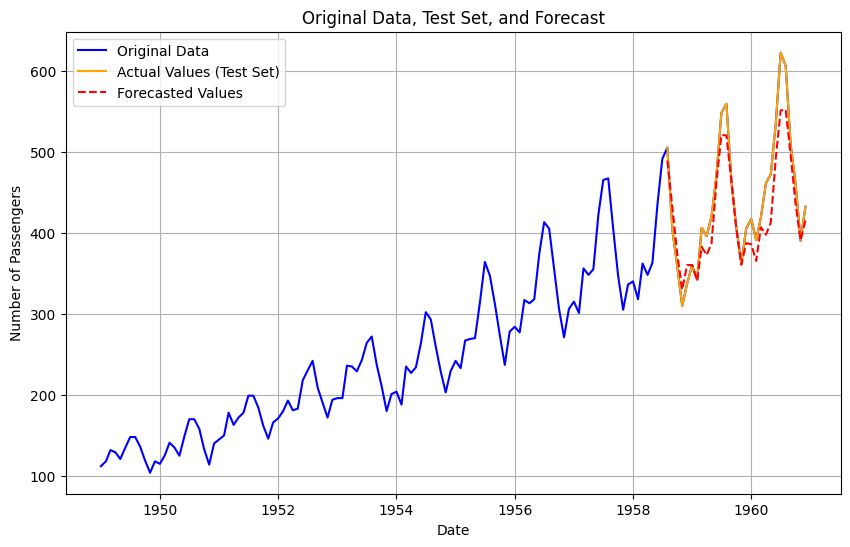

In [66]:
data= pd.read_csv('./datasets/passenger.csv', parse_dates=['Month'],index_col='Month')
forecast_index = data['Passengers'].index[len(train):len(train)+len(test)+1]  # Adjust if the steps exceed 20 months
forecast_values = predicted_sarima

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["Passengers"], label="Original Data", color="blue")

# Plot the actual test data
plt.plot(test.index, test.values, label="Actual Values (Test Set)", color="orange")

# Plot the forecasted values
plt.plot(forecast_index, forecast_values, label="Forecasted Values", color="red", linestyle="dashed")

# Add title, legend, and labels
plt.title("Original Data, Test Set, and Forecast")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.grid()
plt.show()

**Exponential Smoothing**

**Simple**

In [169]:
simple = SimpleExpSmoothing(train, initialization_method="estimated").fit(smoothing_level=0.2)

/home/lost-elf/anaconda3/envs/stats/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [170]:
fcast1 = simple.forecast(len(test))

In [171]:
# Mean Absolute Percentage Error
mape=mean_absolute_error(real_values,fcast1)
print(mape)

66.93188618476262


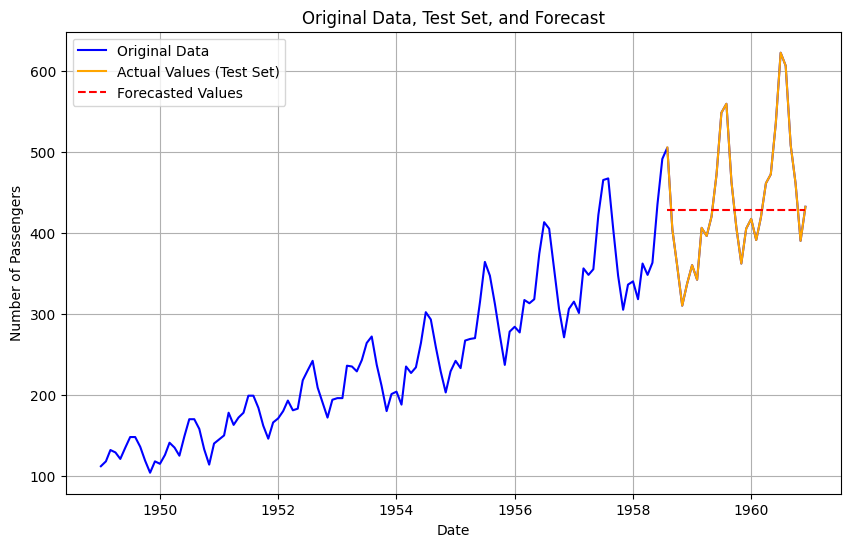

In [154]:
data= pd.read_csv('./datasets/passenger.csv', parse_dates=['Month'],index_col='Month')
forecast_index = data['Passengers'].index[len(train):len(train)+len(test)+1]  # Adjust if the steps exceed 20 months
forecast_values = fcast1

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["Passengers"], label="Original Data", color="blue")

# Plot the actual test data
plt.plot(test.index, test.values, label="Actual Values (Test Set)", color="orange")

# Plot the forecasted values
plt.plot(forecast_index, forecast_values, label="Forecasted Values", color="red", linestyle="dashed")

# Add title, legend, and labels
plt.title("Original Data, Test Set, and Forecast")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.grid()
plt.show()

**Holt's Method**

In [195]:
holts = Holt(train, initialization_method="estimated").fit(smoothing_level=0.2, smoothing_trend=0.2, optimized=False)

/home/lost-elf/anaconda3/envs/stats/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [192]:
fcast2 = holts.forecast(len(test))

In [193]:
# Mean Absolute Percentage Error
mape=mean_absolute_error(real_values,fcast2)
print(mape)

110.64640690227738


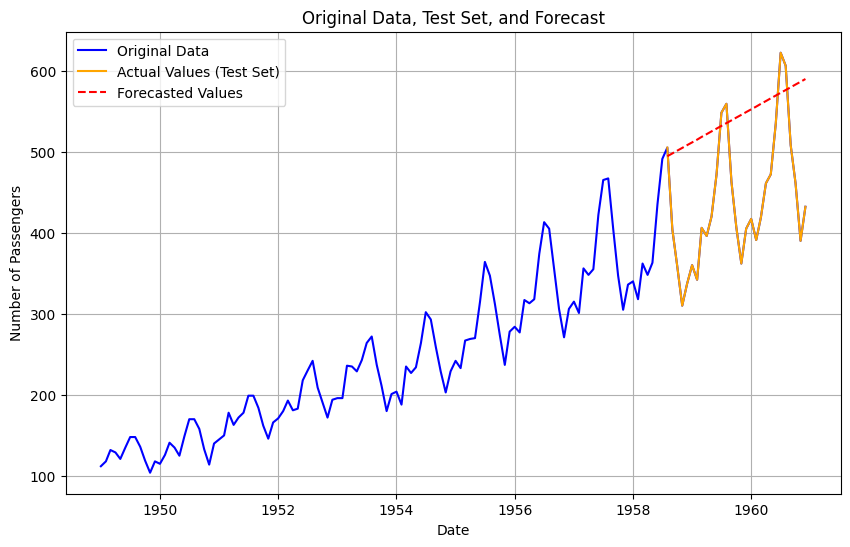

In [194]:
data= pd.read_csv('./datasets/passenger.csv', parse_dates=['Month'],index_col='Month')
forecast_index = data['Passengers'].index[len(train):len(train)+len(test)+1]  # Adjust if the steps exceed 20 months
forecast_values = fcast2

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["Passengers"], label="Original Data", color="blue")

# Plot the actual test data
plt.plot(test.index, test.values, label="Actual Values (Test Set)", color="orange")

# Plot the forecasted values
plt.plot(forecast_index, forecast_values, label="Forecasted Values", color="red", linestyle="dashed")

# Add title, legend, and labels
plt.title("Original Data, Test Set, and Forecast")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.grid()
plt.show()

**Holt's Winter**

In [187]:
holtsWinter = ExponentialSmoothing(
    train,
    seasonal_periods=12,
    trend="add",
    seasonal="add",
    use_boxcox=True,
    initialization_method="estimated",
).fit()


/home/lost-elf/anaconda3/envs/stats/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [188]:
fcast3 = holtsWinter.forecast(len(test))

In [189]:
# Mean Absolute Percentage Error
mape=mean_absolute_error(real_values,fcast3)
print(mape)

33.190135629920164


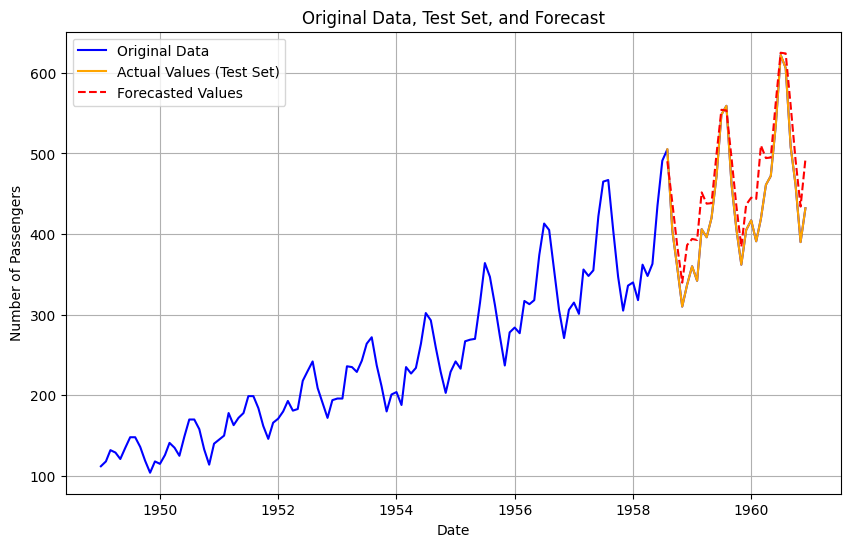

In [190]:
data= pd.read_csv('./datasets/passenger.csv', parse_dates=['Month'],index_col='Month')
forecast_index = data['Passengers'].index[len(train):len(train)+len(test)+1]  # Adjust if the steps exceed 20 months
forecast_values = fcast3

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["Passengers"], label="Original Data", color="blue")

# Plot the actual test data
plt.plot(test.index, test.values, label="Actual Values (Test Set)", color="orange")

# Plot the forecasted values
plt.plot(forecast_index, forecast_values, label="Forecasted Values", color="red", linestyle="dashed")

# Add title, legend, and labels
plt.title("Original Data, Test Set, and Forecast")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.grid()
plt.show()